# Introduction
MANY VEHICLE control systems use current and/or future vehicle state information to improve vehicle stability. Current state information is used to calculate the control input in real time, whereas future state information is used to determine the reference trajectory and the times when these control actions should be in effect.

- An observer is a dynamic system that is used to estimate the state of a system or some of the states of a system. A full-state
observer is used to estimate all the states of the system.

    Specifically, a full-state observer has the following characteristics,

    1) The purpose of the observer is to generate an estimate of the state $x(t)$ based on measurements of the system output
    $y(t)$ and the system input $u(t)$. The input and output signals are assumed to be exactly measurable—no noise or other
    interference.

    2) The observer uses a mathematical model of the state space realization of the system. Therefore, the matrices
    are assumed to be known exactly. The possibility of modeling errors is not included in the derivation of the observer.

    3) The observer is an nth-order linear dynamic system, where n is the number of state variables in the system.

    4) Assuming that the observer is to be used as part of a feedback control system, the estimate will be used by the
    controller as if it were the true state $x(t)$. Thus, with full-state feedback control using a full-state observer, the         control signal is generated.

    5) The observer being considered in these notes is a deterministic system. It assumes that there is no measurement noise or
    unmeasured disturbances acting on the system. If there are disturbances and measurement noise acting on the system, then the     $Kalman$ $filter$ should be implemented since it uses knowledge of the statistical properties of the system in its design
    
# Full state estimation

Let us consider a linear system:
\begin{equation}
\dot{X}=AX+BU           \quad\quad\ X\in R^{n} \quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\ (1)                 
\end{equation}
And also another equation as
\begin{equation}
Y=CX                     \quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\ (2)
\end{equation}
So if we have a linear system with matrices A and C as observable, meaning this observability matrix has rank N and spanes the state space then we can develop optimal full state estimator that we can combine with our full state feedback controller.
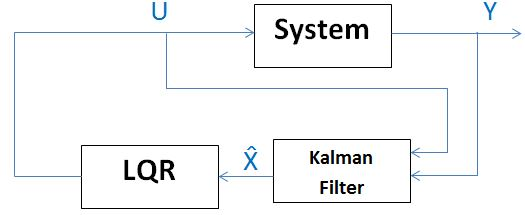
Let us take the controls input $U$, measurements $Y$ as inputs to full state estimator and $\hat{X}$ as output,
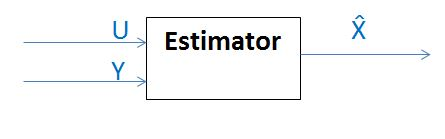
the above system itself a $linear$ $dynamical$ $system$

# Equation of full state estimator

 The equation as follows,
 
\begin{equation}
d/dt {\hat{(X)}}=A\hat{X}+BU+K_{f}(Y-\hat{Y})  \quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\  (3)
\end{equation}
$K_{f}$=Constant matrix
\begin{equation}
\hat{Y}=C\hat{(X)}                    \quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\ (4) 
\end{equation}
$K_{f}(Y-\hat{Y})$= update based on new measurements on new data $Y$

On substituting $\hat{Y}$ in $(3)$ and solving it we get,
\begin{equation}
d/dt {\hat{(X)}}=(A-K_{f}C)\hat{X}+BU+K_{f}Y  \quad\quad\quad\quad\quad\quad\quad\quad\quad\  (5)
\end{equation}
$(A-K_{f}C)$= dynamics
 
- If these dynamics are stable then $\hat{X}$ will stabili converge to $X$ 

 
Now let us define an error
\begin{equation}
\epsilon=X-\hat{X}\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\  (6)
\end{equation}
\begin{equation}
d/dt {(\epsilon)}=d/dt {(X)}-d/dt {\hat{(X)}}  \quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\  (7)
\end{equation}

On substituing $\hat{X}$ in $(7)$ and solving it we get,
\begin{equation}
d/dt {(\epsilon)}=(A-K_{f})\epsilon  \quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\  (8)
\end{equation}

Equation $(8)$ tells that,
- Error between true full state and estimated full state can be made stable and go to zero by making $(A-K_{f})$ eigen values stable.
- If $A$ and $C$ are observable now then with an appropriate choice of $K_{f}$ (kalman filter gain matrix), we can place the eigen values of this anywhere we want and hence there will be an optimal choice. 

But in reality always disturbance state $W_{d}$ and measurement noise $W_{n}$ will be present,

It means $(1)$ and $(2)$ becomes as
\begin{equation}
\dot{X}=AX+BU+W_{d}           \quad\quad\ X\in R^{n} \quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\ (1)                 
\end{equation}
And also another equation as
\begin{equation}
Y=CX+W_{n}                     \quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\ (2)
\end{equation}

That's why $Kalman$  $filter$ should be implemented since it provides knowledge about magnitude of the disturbances and magnitude of sensor noise.

# Kalman Filter:
Kalman filter is basically $"analog$ $linear$ $quadratic$ $regulator"$ for estimation. Its optimal full state estimator gives knowledge about types of disturbances and types of noises present in the system.

Assume,

$W_{d}$=Gaussian disturbance 

$V_{d}$=Gaussian variance

$W_{n}$=Gaussian noise

$V_{n}$=Gaussian variance

- If $W_{d}$ is larger than $W_{n}$ then trust measurements $Y$.
- If $W_{n}$ is larger than $W_{d}$ then trust the model.

$Note$:
If had an ensemble of difference disturbances and noises sampled from the distributions then we would want to choose kalman filter gain $K_{f}$ to minimise the expected error between full state and estimate.

# Summary:
- With an appropriate choice of  $K_{f}$ (kalman filter gain matrix), we can obtain complete full state optimal system.
- Kalman filter gain can be find using MATLAB $>>K_{f} = lqe(A,C,V_{d},V_{n})$